In [1]:
import sqlite3
import sqlalchemy as db
from sqlalchemy.orm import Session
import matplotlib as plt
from collections import Counter
import operator

import matplotlib.pyplot as plt

In [2]:
engine = db.create_engine('sqlite:///flights.sqlite3', echo=True)     #relative directory (in same folder as this notebook so no directory)
connection = engine.connect()
flights = db.Table('ontime', db.MetaData(), autoload=True, autoload_with=engine)
session = Session(bind=engine)
cols = flights.columns

2019-12-01 21:54:38,125 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-12-01 21:54:38,126 INFO sqlalchemy.engine.base.Engine ()
2019-12-01 21:54:38,128 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-12-01 21:54:38,128 INFO sqlalchemy.engine.base.Engine ()
2019-12-01 21:54:38,131 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("ontime")
2019-12-01 21:54:38,134 INFO sqlalchemy.engine.base.Engine ()
2019-12-01 21:54:38,138 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'ontime' AND type = 'table'
2019-12-01 21:54:38,139 INFO sqlalchemy.engine.base.Engine ()
2019-12-01 21:54:38,142 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("ontime")
2019-12-01 21:54:38,143 INFO sqlalchemy.engine.base.Engine ()
2019-12-01 21:54:38,145 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SEL

In [3]:
cols.keys()

['Year',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'DepTime',
 'CRSDepTime',
 'ArrTime',
 'CRSArrTime',
 'UniqueCarrier',
 'FlightNum',
 'TailNum',
 'ActualElapsedTime',
 'CRSElapsedTime',
 'AirTime',
 'ArrDelay',
 'DepDelay',
 'Origin',
 'Dest',
 'Distance',
 'TaxiIn',
 'TaxiOut',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay']

In [4]:
def intervals(timeDelay):
    ranges = {
        "Jan.": session.query(cols.Month).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.Month.cast(db.Integer) == 1 ).all(),
        "Feb.": session.query(cols.Month).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.Month.cast(db.Integer) == 2).all(),
        "Mar.": session.query(cols.Month).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.Month.cast(db.Integer) == 3).all(),
        "Apr.": session.query(cols.Month).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.Month.cast(db.Integer) == 4).all(),
        "May": session.query(cols.Month).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.Month.cast(db.Integer) == 5).all(),
        "June": session.query(cols.Month).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.Month.cast(db.Integer) == 6).all(),
        "July": session.query(cols.Month).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.Month.cast(db.Integer) == 7).all(),
        "Aug.": session.query(cols.Month).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.Month.cast(db.Integer) == 8).all(),
        "Sept.": session.query(cols.Month).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.Month.cast(db.Integer) == 9).all(),
        "Oct.": session.query(cols.Month).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.Month.cast(db.Integer) == 10).all(),
        "Nov.": session.query(cols.Month).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.Month.cast(db.Integer) == 11).all(),
        "Dec.": session.query(cols.Month).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.Month.cast(db.Integer) == 12).all()
    }
    interval_totals = {}
    for key in ranges.keys():
        interval_totals[key] = len(ranges[key])
    return interval_totals

In [5]:
onehour = intervals(60)

2019-12-01 21:54:38,223 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2019-12-01 21:54:38,225 INFO sqlalchemy.engine.base.Engine SELECT ontime."Month" AS "ontime_Month" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."Month" AS INTEGER) = ?
2019-12-01 21:54:38,226 INFO sqlalchemy.engine.base.Engine (60, 1)
2019-12-01 21:55:04,910 INFO sqlalchemy.engine.base.Engine SELECT ontime."Month" AS "ontime_Month" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."Month" AS INTEGER) = ?
2019-12-01 21:55:04,911 INFO sqlalchemy.engine.base.Engine (60, 2)
2019-12-01 21:55:31,382 INFO sqlalchemy.engine.base.Engine SELECT ontime."Month" AS "ontime_Month" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."Month" AS INTEGER) = ?
2019-12-01 21:55:31,382 INFO sqlalchemy.engine.base.Engine (60, 3)
2019-12-01 21:55:54,279 INFO sqlalchemy.engine.base.Engine SELECT ontime."Month" AS "ontime_Month" 
FROM ontime 
WHERE CAST(on

In [6]:
threehours = intervals(180)

2019-12-01 21:59:45,590 INFO sqlalchemy.engine.base.Engine SELECT ontime."Month" AS "ontime_Month" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."Month" AS INTEGER) = ?
2019-12-01 21:59:45,592 INFO sqlalchemy.engine.base.Engine (180, 1)
2019-12-01 22:00:10,696 INFO sqlalchemy.engine.base.Engine SELECT ontime."Month" AS "ontime_Month" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."Month" AS INTEGER) = ?
2019-12-01 22:00:10,696 INFO sqlalchemy.engine.base.Engine (180, 2)
2019-12-01 22:00:33,589 INFO sqlalchemy.engine.base.Engine SELECT ontime."Month" AS "ontime_Month" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."Month" AS INTEGER) = ?
2019-12-01 22:00:33,589 INFO sqlalchemy.engine.base.Engine (180, 3)
2019-12-01 22:01:03,446 INFO sqlalchemy.engine.base.Engine SELECT ontime."Month" AS "ontime_Month" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."Month" AS INTEGER) = ?


In [7]:
fivehours = intervals(300)

2019-12-01 22:05:09,005 INFO sqlalchemy.engine.base.Engine SELECT ontime."Month" AS "ontime_Month" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."Month" AS INTEGER) = ?
2019-12-01 22:05:09,009 INFO sqlalchemy.engine.base.Engine (300, 1)
2019-12-01 22:05:32,365 INFO sqlalchemy.engine.base.Engine SELECT ontime."Month" AS "ontime_Month" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."Month" AS INTEGER) = ?
2019-12-01 22:05:32,373 INFO sqlalchemy.engine.base.Engine (300, 2)
2019-12-01 22:05:55,206 INFO sqlalchemy.engine.base.Engine SELECT ontime."Month" AS "ontime_Month" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."Month" AS INTEGER) = ?
2019-12-01 22:05:55,219 INFO sqlalchemy.engine.base.Engine (300, 3)
2019-12-01 22:06:20,980 INFO sqlalchemy.engine.base.Engine SELECT ontime."Month" AS "ontime_Month" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."Month" AS INTEGER) = ?


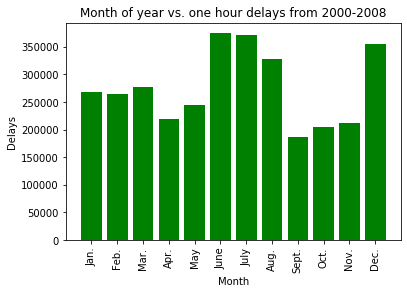

In [11]:
import matplotlib.pyplot as plt
plt.bar(onehour.keys(), onehour.values(), width=0.8, color='g')
plt.xticks(range(len(onehour)), onehour.keys(), rotation=90)
plt.title("Month of year vs. one hour delays from 2000-2008")
plt.xlabel("Month")
plt.ylabel("Delays")
plt.show()

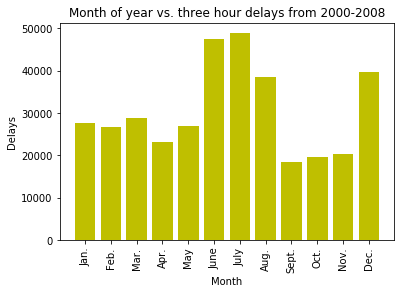

In [15]:
plt.bar(threehours.keys(), threehours.values(), width=0.8, color='y')
plt.xticks(range(len(threehours)), threehours.keys(), rotation=90)
plt.title("Month of year vs. three hour delays from 2000-2008")
plt.xlabel("Month")
plt.ylabel("Delays")
plt.show()

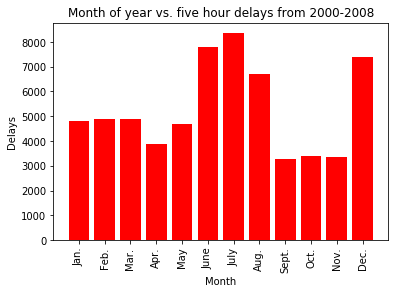

In [16]:
plt.bar(fivehours.keys(), fivehours.values(), width=0.8, color='r')
plt.xticks(range(len(fivehours)), fivehours.keys(), rotation=90)
plt.title("Month of year vs. five hour delays from 2000-2008")
plt.xlabel("Month")
plt.ylabel("Delays")
plt.show()